In [3]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 10

frequencies = [50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(80)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_interface_condu(1,1e7)
model = FourierModelFDTR(domain,4e-6,4e-6)

phases_60 = []
for f in frequencies:
  phases_60.append(model.get_phase(f))


domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_interface_condu(1,1e7)
model2 = FourierModelFDTR(domain,4e-6,4e-6)

phases_20 = []
for f in frequencies:
  phases_20.append(model2.get_phase(f))



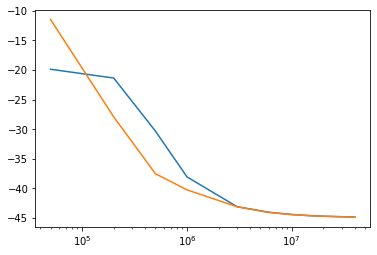

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_60);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_20);  # Plot some data on the axes.